In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd 
import seaborn as sns 
import os 


C:\Users\PC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\PC\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train_full[0].shape

(28, 28)

In [9]:
#create a validation data set from the full training data 
#Scale the data between 0 to 1 by dividing it by 255 as its unsigned data between 0-255 range
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000]/255.,y_train_full[5000:]/255.
#SCale the test set as well
X_test=X_test/255.

In [10]:
X_train.shape

(55000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_valid.shape

(5000, 28, 28)

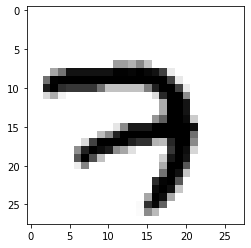

In [16]:
plt.imshow(X_train[0],cmap='binary')
plt.show()


In [20]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
       tf.keras.layers.Dense(300,activation='relu',name="hiddenLayer1",kernel_regularizer=regularizers.L2(1e-4)),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dense(100,activation='relu',name="hiddenLayer2"),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')]

In [21]:
model=tf.keras.models.Sequential(Layers)

In [22]:
#Method-2
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [23]:
models=Sequential()
models.add(Flatten(input_shape=[28,28],name="inputLayer"))
models.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.L2(1e-4)))
models.add(Dropout(0.2))
models.add(Dense(units=32,activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4)))
models.add(Dropout(0.2))
models.add(Dense(units=10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                      

In [25]:
models.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [26]:
Loss='sparse_categorical_crossentropy'
optimizer="SGD"
metrics=['accuracy']
model.compile(loss=Loss,optimizer=optimizer,metrics=metrics)

In [27]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0702 - accuracy: 0.0985 - val_loss: 0.0436 - val_accuracy: 0.0958
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0441 - accuracy: 0.0990 - val_loss: 0.0430 - val_accuracy: 0.0958
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.0990 - val_loss: 0.0426 - val_accuracy: 0.0958
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0427 - accuracy: 0.0990 - val_loss: 0.0422 - val_accuracy: 0.0958
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0423 - accuracy: 0.0990 - val_loss: 0.0419 - val_accuracy: 0.0958
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0420 - accuracy: 0.0990 - val_loss: 0.0416 - val_accuracy: 0.0958
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0417 - accuracy: 0.0990 - val_loss: 0.0413 - val_accuracy:

In [28]:
import pandas as pd 

<AxesSubplot:>

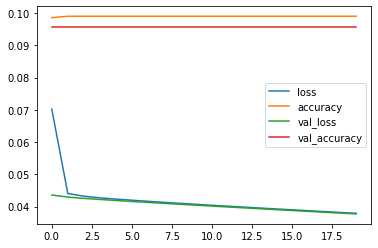

In [29]:
pd.DataFrame(history.history).plot()